In [369]:
"""SEQN: Sequence number (identifier)
RIAGENDR: Respondent's Gender (1=Male, 2=Female)
PAQ605: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week
BMXBMI: Body Mass Index
LBXGLU: Glucose level
DIQ010: Diabetes questionnaire response
LBXGLT: Glucose tolerance (Oral)
LBXIN: Insulin level"""

"SEQN: Sequence number (identifier)\nRIAGENDR: Respondent's Gender (1=Male, 2=Female)\nPAQ605: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week\nBMXBMI: Body Mass Index\nLBXGLU: Glucose level\nDIQ010: Diabetes questionnaire response\nLBXGLT: Glucose tolerance (Oral)\nLBXIN: Insulin level"

In [370]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
df = pd.read_csv("Train_Data.csv")

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [372]:
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [373]:
df.shape

(1966, 9)

In [374]:
df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [375]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SEQN,1954.0,NaN,NaN,NaN,78683.621801,2924.115709,73564.0,76194.0,78717.0,81217.0,83727.0
RIAGENDR,1948.0,NaN,NaN,NaN,1.510267,0.500023,1.0,1.0,2.0,2.0,2.0
PAQ605,1953.0,NaN,NaN,NaN,1.825397,0.399449,1.0,2.0,2.0,2.0,7.0
BMXBMI,1948.0,NaN,NaN,NaN,27.9654,7.327616,14.5,22.8,26.8,31.3,70.1
LBXGLU,1953.0,NaN,NaN,NaN,99.491039,16.774665,63.0,91.0,97.0,104.0,405.0
DIQ010,1948.0,NaN,NaN,NaN,2.015914,0.187579,1.0,2.0,2.0,2.0,3.0
LBXGLT,1955.0,NaN,NaN,NaN,115.150384,46.271615,40.0,87.0,105.0,131.0,604.0
LBXIN,1957.0,NaN,NaN,NaN,11.862892,9.756713,0.14,5.8,9.03,14.48,102.29
age_group,1952,2,Adult,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
#duplicate data
df.duplicated().sum()

np.int64(0)

In [377]:
df.drop("SEQN", axis = 1, inplace = True)
df.drop('PAQ605', axis = 1, inplace = True)

In [378]:
#Missing data handling
df_copy = df.copy(deep = True)

In [379]:
# Missing Value Count Function
def show_missing():
    missing = df_copy.columns[df_copy.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2))

Missing Data Count
RIAGENDR     18
BMXBMI       18
DIQ010       18
age_group    14
LBXGLU       13
LBXGLT       11
LBXIN         9
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
RIAGENDR     0.92
BMXBMI       0.92
DIQ010       0.92
age_group    0.71
LBXGLU       0.66
LBXGLT       0.56
LBXIN        0.46
dtype: float64


<Axes: >

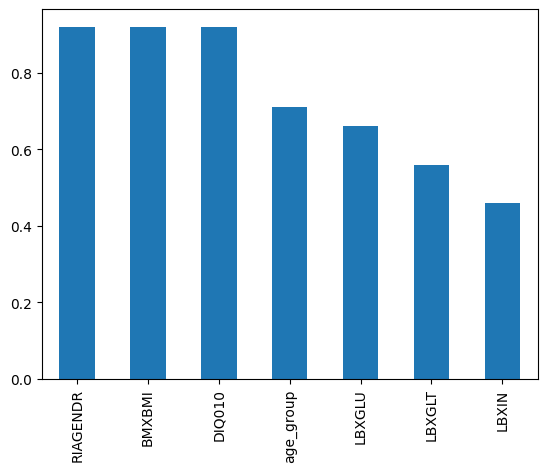

In [380]:
#histogram plot
round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2).plot(kind='bar')


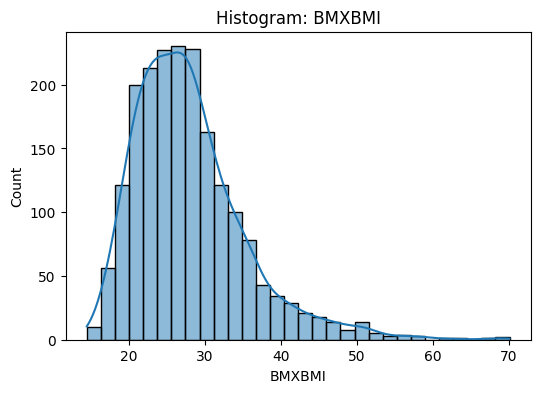

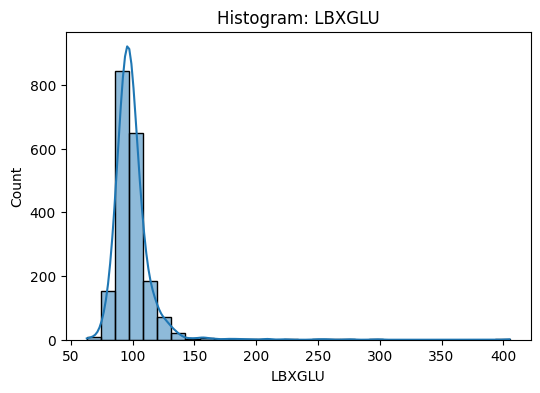

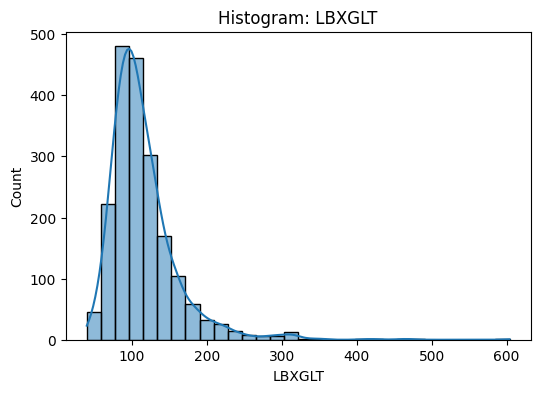

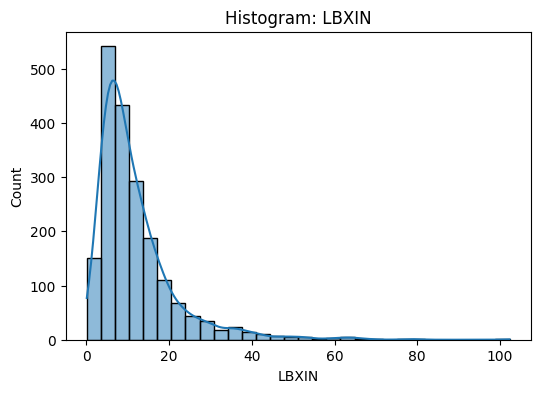

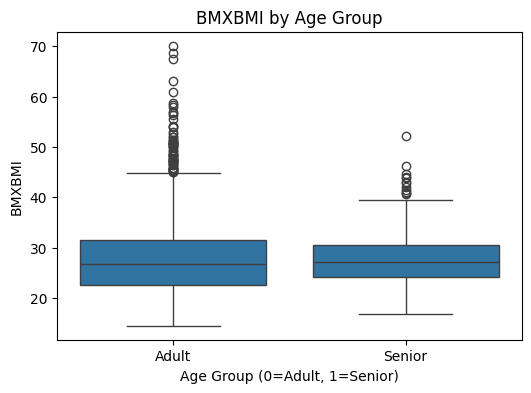

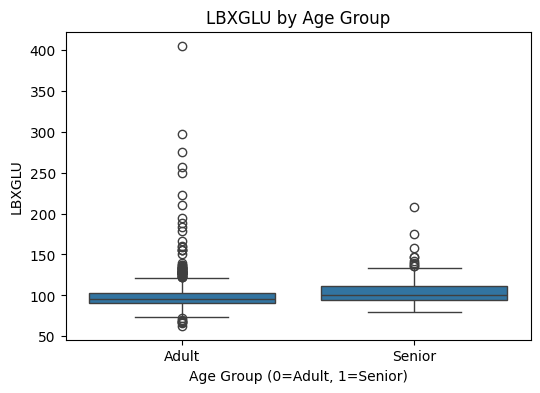

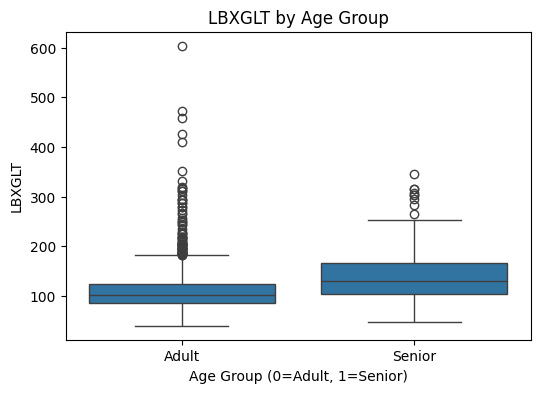

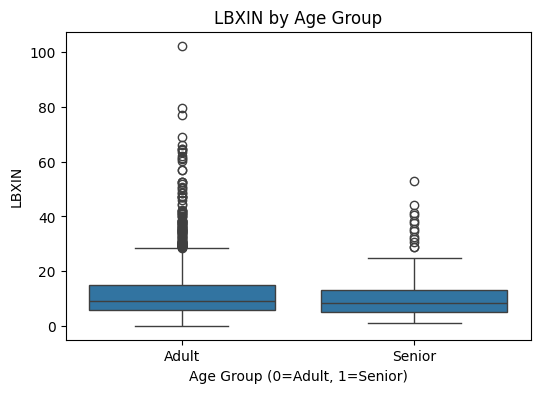

In [381]:
numeric_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Boxplots with respect to age_group
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='age_group', y=col)
    plt.title(f'{col} by Age Group')
    plt.xlabel('Age Group (0=Adult, 1=Senior)')
    plt.ylabel(col)
    plt.show()


In [382]:
le = LabelEncoder()
y = le.fit_transform(df_copy['age_group'])  # Adult = 0, Senior = 1

In [383]:
# Function to impute missing values
def impute_missing_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['int64', 'float64']:
                # Impute numeric columns with median
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # Impute categorical columns with mode
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Impute missing values in the DataFrame copy
df_copy = impute_missing_values(df_copy)

# Verify that there are no more missing values
print('Missing Data Count after imputation')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))

Missing Data Count after imputation
Series([], dtype: float64)


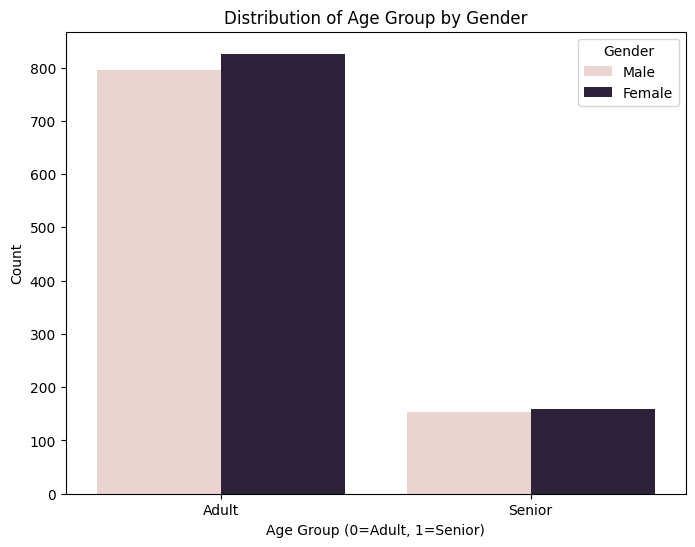

In [384]:
# Age vs. Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', hue='RIAGENDR')
plt.title('Distribution of Age Group by Gender')
plt.xlabel('Age Group (0=Adult, 1=Senior)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

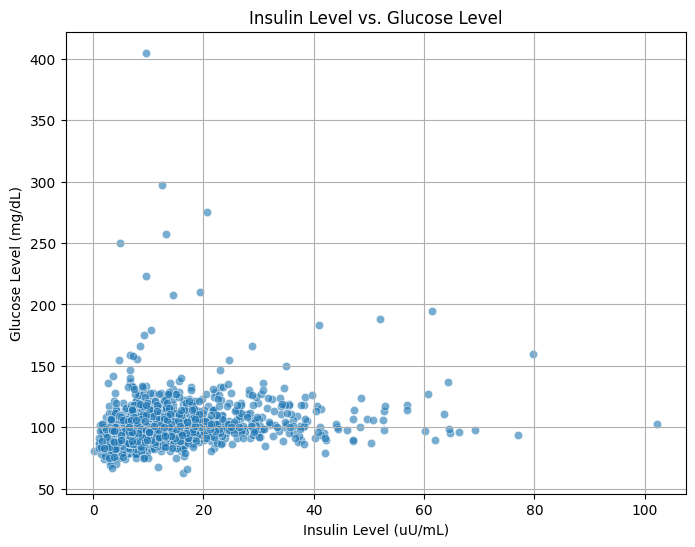

In [385]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='LBXIN', y='LBXGLU', alpha=0.6)
plt.title('Insulin Level vs. Glucose Level')
plt.xlabel('Insulin Level (uU/mL)')
plt.ylabel('Glucose Level (mg/dL)')
plt.grid(True)
plt.show()

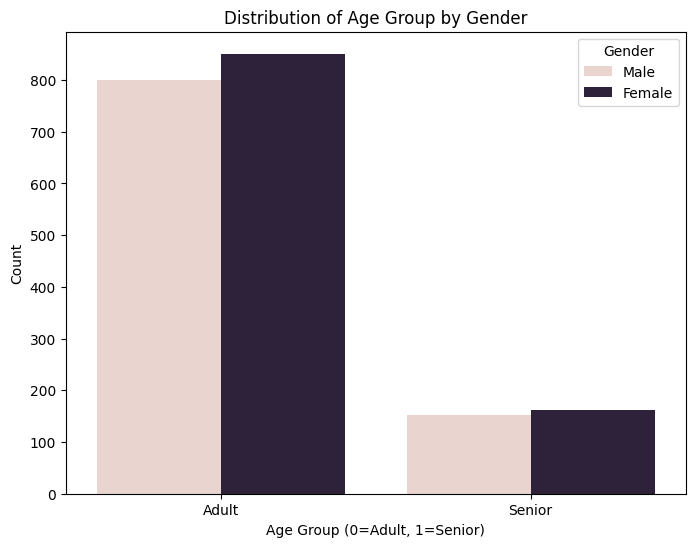

In [386]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='age_group', hue='RIAGENDR')
plt.title('Distribution of Age Group by Gender')
plt.xlabel('Age Group (0=Adult, 1=Senior)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

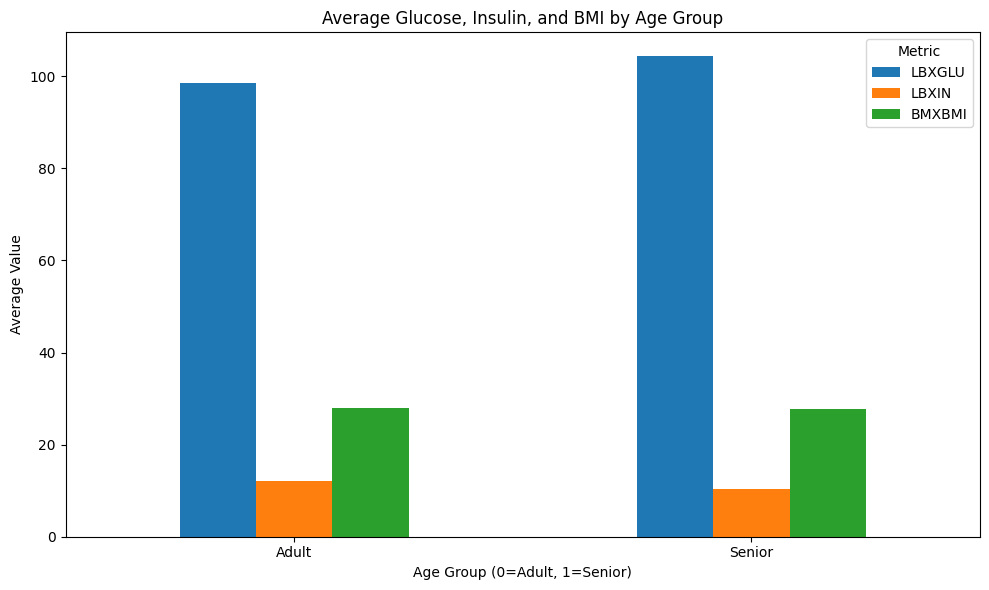

The 'Stroke' column is not found in the DataFrame. Cannot plot stroke distribution.


In [387]:

grouped_data = df_copy.groupby('age_group')[['LBXGLU', 'LBXIN', 'BMXBMI']].mean()

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Glucose, Insulin, and BMI by Age Group')
plt.xlabel('Age Group (0=Adult, 1=Senior)')
plt.ylabel('Average Value')
plt.xticks(ticks=[0, 1], labels=['Adult', 'Senior'], rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Assuming 'Stroke' column exists in your DataFrame for stroke distribution
if 'Stroke' in df_copy.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_copy, x='Stroke')
    plt.title('Distribution of Stroke')
    plt.xlabel('Stroke (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No Stroke', 'Stroke'])
    plt.show()
else:
    print("The 'Stroke' column is not found in the DataFrame. Cannot plot stroke distribution.")

array([[<Axes: title={'center': 'RIAGENDR'}>,
        <Axes: title={'center': 'BMXBMI'}>],
       [<Axes: title={'center': 'LBXGLU'}>,
        <Axes: title={'center': 'DIQ010'}>],
       [<Axes: title={'center': 'LBXGLT'}>,
        <Axes: title={'center': 'LBXIN'}>]], dtype=object)

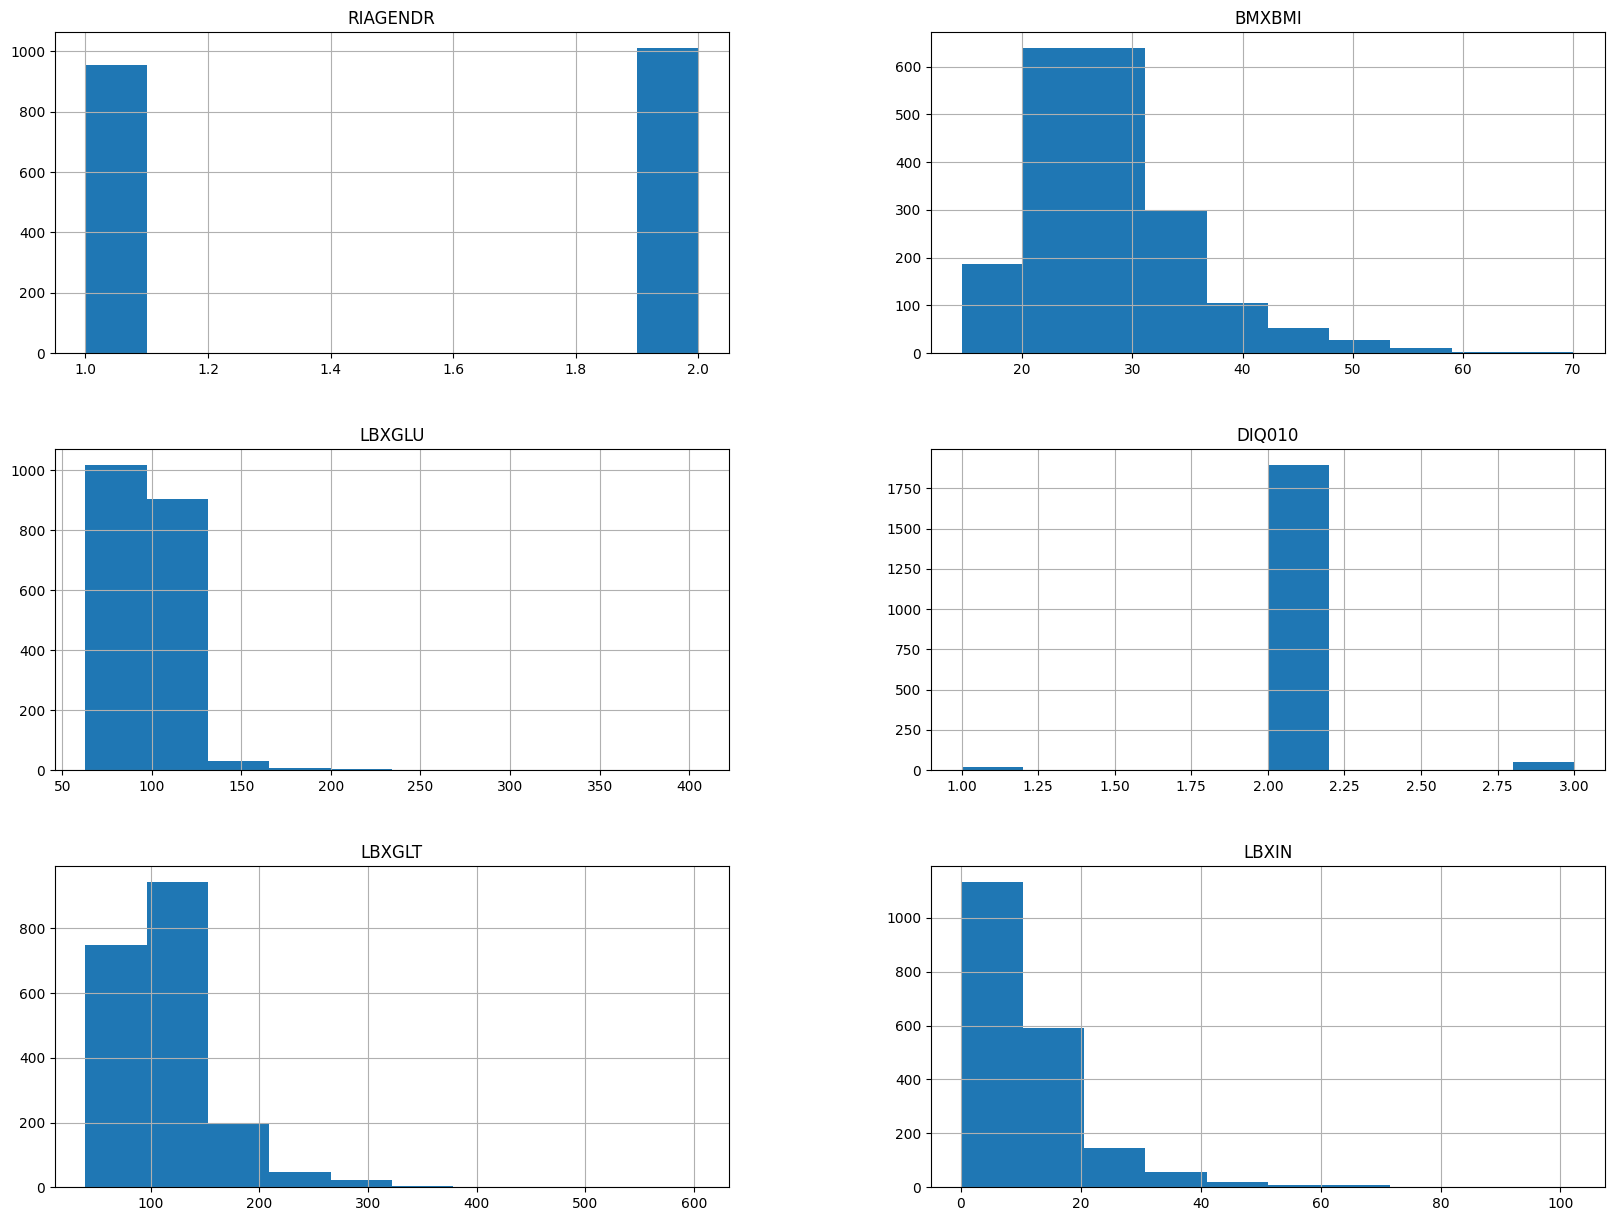

In [388]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_copy.hist(ax = ax)

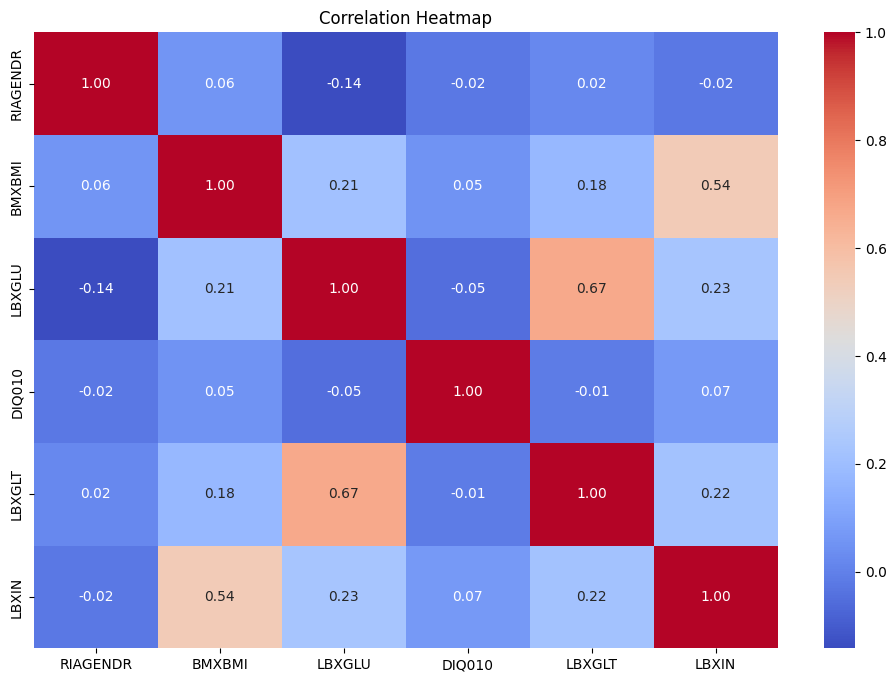

In [389]:
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns before calculating correlation
numeric_df = df_copy.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [390]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_copy.drop('age_group', axis=1)
y = df_copy['age_group']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)
test = pd.read_csv('Test_Data.csv')
test = pd.get_dummies(test)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1474, 6)
Shape of X_test: (492, 6)
Shape of y_train: (1474,)
Shape of y_test: (492,)


In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model using F1-score
f1 = f1_score(y_test, y_pred, pos_label='Senior')

print(f"F1-score of the Logistic Regression model: {f1:.4f}")

F1-score of the Logistic Regression model: 0.1111


In [392]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

f1_rf = f1_score(y_test, y_pred_rf, pos_label='Senior')
print(f"F1-score of the Random Forest model: {f1_rf:.4f}")

F1-score of the Random Forest model: 0.1600


In [393]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

f1_svm = f1_score(y_test, y_pred_svm, pos_label='Senior') # Use the appropriate pos_label if needed

print(f"F1-score of the SVM model: {f1_svm:.4f}")

F1-score of the SVM model: 0.0000


In [394]:
knn_model = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

f1_knn = f1_score(y_test, y_pred_knn, pos_label='Senior')

print(f"F1-score of the K-Nearest Neighbors model: {f1_knn:.4f}")

F1-score of the K-Nearest Neighbors model: 0.2353


In [395]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

f1_nb = f1_score(y_test, y_pred_nb, pos_label='Senior')

print(f"F1-score of the Naive Bayes model: {f1_nb:.4f}")


F1-score of the Naive Bayes model: 0.1714


In [396]:
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

f1_dt = f1_score(y_test, y_pred_dt, pos_label='Senior')

print(f"F1-score of the Decision Tree model: {f1_dt:.4f}")

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Adult', 'Senior'], # Adjust class names if different
                           filled=True, rounded=True,
                           special_characters=True)

graph = Source(dot_data)



F1-score of the Decision Tree model: 0.2821


In [397]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'Adult' → 0, 'Senior' → 1
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, random_state=42)

In [398]:
!pip install xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss',
                              use_label_encoder=False,
                              random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using F1-score
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)
print(f"F1-score of the XGBoost model: {f1_xgb:.4f}")


F1-score of the XGBoost model: 0.2586


In [400]:
from sklearn.metrics import f1_score,classification_report

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print(classification_report(y_test, y_pred))

F1 Score: 0.14583333333333334
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       413
           1       0.41      0.09      0.15        79

    accuracy                           0.83       492
   macro avg       0.63      0.53      0.53       492
weighted avg       0.78      0.83      0.79       492



Model Comparison based on F1 Score:
                 Model  F1 Score
4          Naive Bayes  0.282051
3  K-Nearest Neighbors  0.235294
5        Random Forest  0.171429
1        Random Forest  0.160000
0  Logistic Regression  0.111111
2                  SVM  0.000000


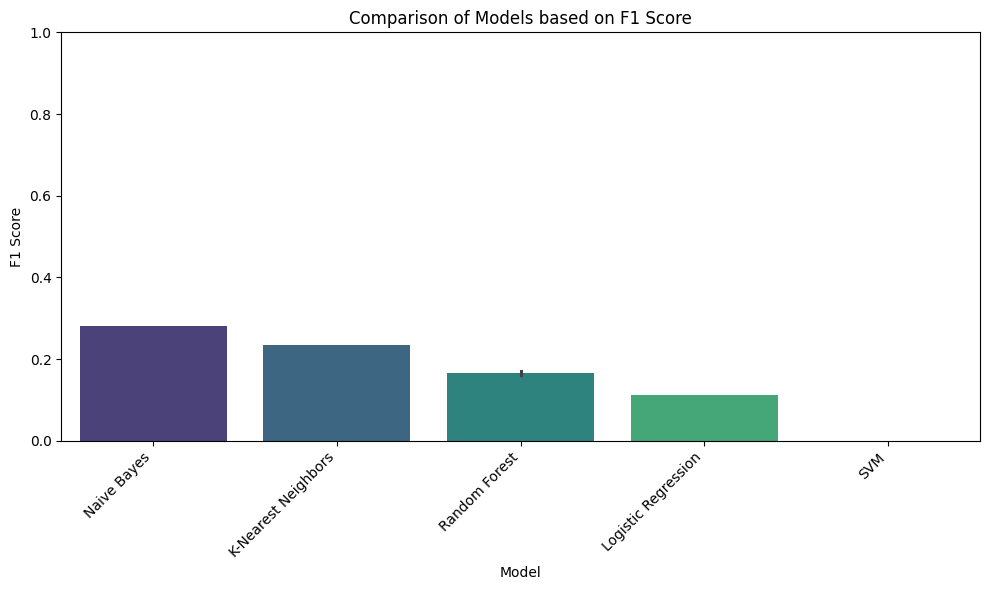

In [401]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Nearest Neighbors','Naive Bayes', 'Random Forest']
f1_scores = [f1, f1_rf, f1_svm, f1_knn,f1_dt,f1_nb]

comparison_df = pd.DataFrame({'Model': model_names, 'F1 Score': f1_scores})

comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)

print("Model Comparison based on F1 Score:")
print(comparison_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=comparison_df, palette='viridis')
plt.title('Comparison of Models based on F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1) # F1 score is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [404]:
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))  # Focus on "Senior"
print(classification_report(y_test, y_pred, target_names=le.classes_))

F1 Score: 0.14583333333333334
              precision    recall  f1-score   support

       Adult       0.85      0.98      0.91       413
      Senior       0.41      0.09      0.15        79

    accuracy                           0.83       492
   macro avg       0.63      0.53      0.53       492
weighted avg       0.78      0.83      0.79       492

